# <font color="#0995EC"> I. Introduction </font>

The objective of this project is to visualize data and provide preliminary observations. After that, we need to inherit NeuralNet class for regression and implement Nonlinear Regression classifier and use 5-fold cross validation to find good neural network paramters including structure an report the test accuracy. To accomplish this, I have created Logistic Regression class and 5 fold cross validation function and then train the model and report the test accuracy.

# <font color="#FE2E64"> II. Data </font>


## Dataset Description:
This research was conducted in Chung Hua University, Taiwan and aims at customer's credit card default payments. The goal is to classify whether the customer will have a default payment for the following month or not. The dataset has 23 inputs on which the decision will depend.

**It consists of the following attributes:**
1. default payment (Yes = 1, No = 0) 
2. X1: Amount of the given credit
3. X2: Gender (1 = male; 2 = female). 
4. X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
5. X4: Marital status (1 = married; 2 = single; 3 = others). 
6. X5: Age (year). 
7. X6 - X11: History of past payment. Tracked the past monthly payment records (from April to September, for the year 2005) as follows:<br>
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.<br>
The measurement scale for the repayment status is: -1 = pay duly, -2 = No consumption; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
8. X12-X17: Amount of bill statement.<br>
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
9. X18-X23: Amount of previous payment. <br>
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Source of data
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import copy
import matplotlib.pyplot as plt

from sklearn import metrics
from IPython.display import display, Markdown, HTML

# Configurations
matplotlib.rcParams['agg.path.chunksize'] = 10000
%matplotlib inline

# Set display parameters
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

### Sample of first few rows

In [2]:
df = pd.read_csv(r'Credit Card Defaulters.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,...,0,0,0,0,1
1,2,120000,2,2,2,...,1000,1000,0,2000,1
2,3,90000,2,2,2,...,1000,1000,1000,5000,0
3,4,50000,2,2,1,...,1200,1100,1069,1000,0
4,5,50000,1,2,1,...,10000,9000,689,679,0


### Variable Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

**_Checking the type of each variable and if there are any missing values in the dataset. Since all the columns have 30000 entries, we will continue with further stages of pre-processing._**

In [4]:
df['SEX'].replace({1: 'Male', 2 : 'Female'}, inplace=True)
df['MARRIAGE'].replace({1: 'Married', 2 : 'Single', 3 : 'Others'}, inplace=True)
df['EDUCATION'].replace({1: 'Gradudate School', 2 : 'Univeristy', 3 : 'High School', 4 : 'Others'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,Univeristy,Married,...,0,0,0,0,1
1,2,120000,Female,Univeristy,Single,...,1000,1000,0,2000,1
2,3,90000,Female,Univeristy,Single,...,1000,1000,1000,5000,0
3,4,50000,Female,Univeristy,Married,...,1200,1100,1069,1000,0
4,5,50000,Male,Univeristy,Married,...,10000,9000,689,679,0


**As a part of pre-processing replacing number with characters so that graphs look more visually appealing and user readable.**

### Correlation Matrix

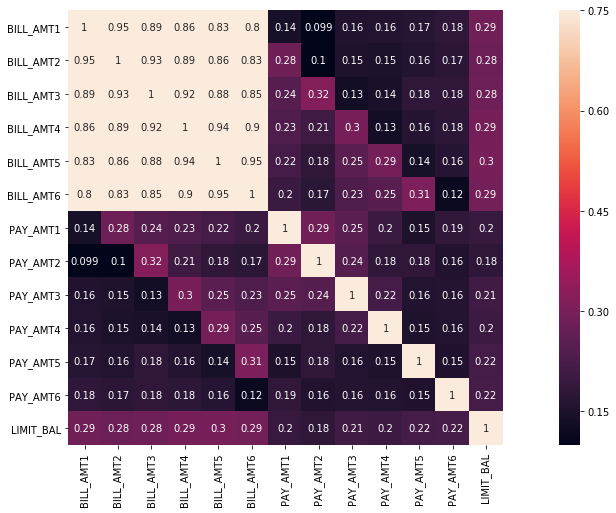

In [5]:
corrmat=df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6","LIMIT_BAL" ]].corr()
fig, plot2=plt.subplots(figsize=(20,8))
sns.heatmap(corrmat, vmax=.75, square=True, annot=True)
plt.show()

*I have created a correlation matrix between limit balances, bill amounts and payments amounts. We can infer that there is a low correlation between the limit balances and payments and bill amounts. But it can be seen that bill amounts has high correlation between each other as expected since the bills are reflecting the cumulative amounts.*

### Box Plot

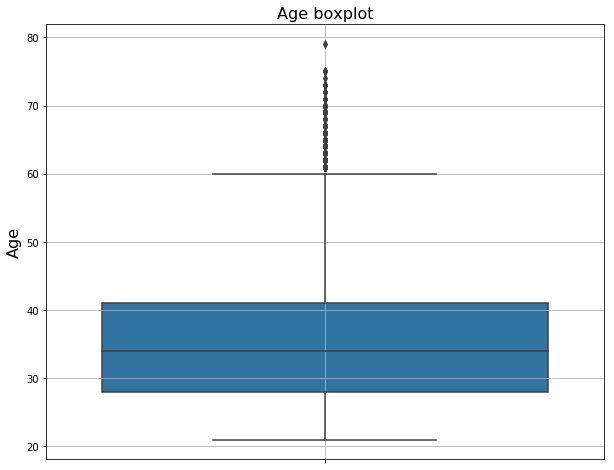

In [6]:
plt.figure(figsize=(10,8))
age=df[(df['AGE']>=21) & (df['AGE']<=80) ]
sns.boxplot( y=age['AGE'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

**Age Boxplot**

*The median age is 34 years old and most customers are between 28 and 41 years old*

### Bar Plot

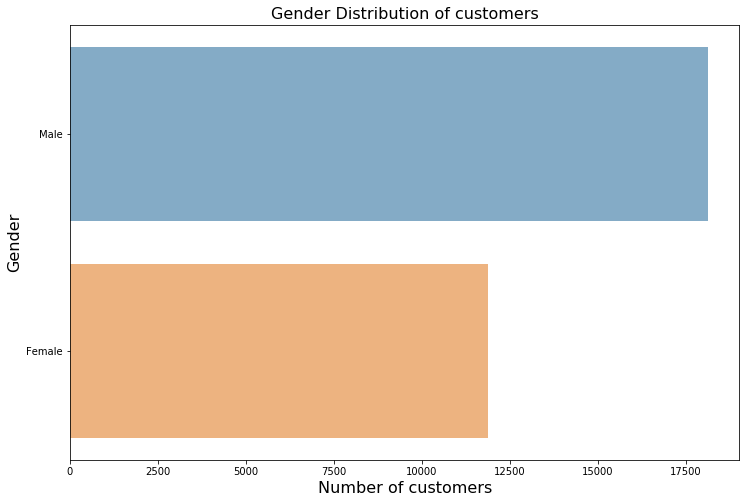

In [7]:
plt.figure(figsize=(12,8))
sex = df['SEX'].value_counts()
sns.barplot(y=sex.index, x=sex.values, alpha=0.6)
plt.yticks(range(len(df['SEX'].value_counts().index)), ['Male', 'Female'])
plt.title("Gender Distribution of customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();

*The above barplot shows the number of male and female customers in the dataset. Male customers are dominating population in the dataset so we can infer that there could be a possibility of males customers using the credit card more than female customers.*

*From the above plot we can see that there is no change at female side in balance limits depending on their marital status but it changes a lot for the male side maybe because of the expenditures after marriage which is the reason on increased balance limits.*

### Bar Plot

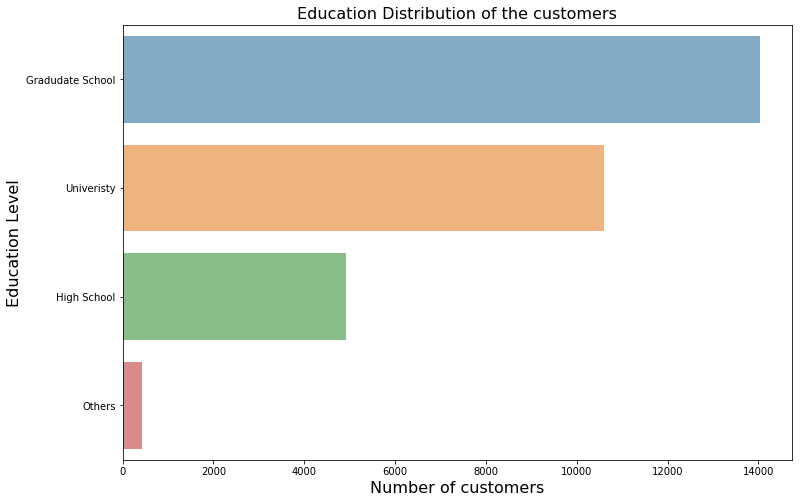

In [8]:
plt.figure(figsize=(12,8))
edu = df['EDUCATION'].value_counts()
sns.barplot(y=edu.index, x=edu.values, alpha=0.6)
plt.yticks(range(len(df['EDUCATION'].value_counts().index)), ['Gradudate School', 'Univeristy', 'High School', 'Others'])
plt.title("Education Distribution of the customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Education Level", fontsize=16)
plt.show();

*The above barplot shows the number of customers and their education level in the data set. Maximum number of Graduate school students are using the  credit card followed by university going students, high school students and others.*

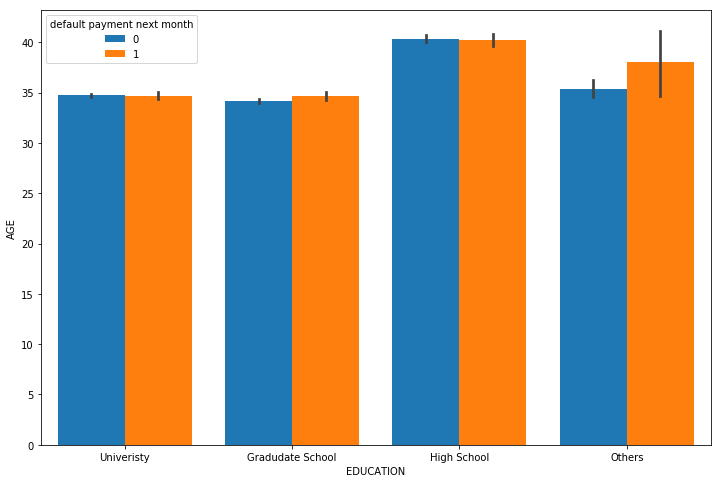

In [9]:
plt.figure(figsize=(12,8))
df["default payment next month"].replace({""})
sns.barplot(x='EDUCATION',y='AGE', hue='default payment next month', data=df, saturation=1 )

*The above graph is a comparison between age and education and shows customers who have a default payment next month. Most of the defaulters are others who could probably be school drop outs and hence don't have funds in the form of scholarship to meet their payments and end up being defaulters.
Whereas all the other students could be among the people with scholarship or funds from their parents and have an equal possibility of not being defaulters.*

### Pie chart and Count plot

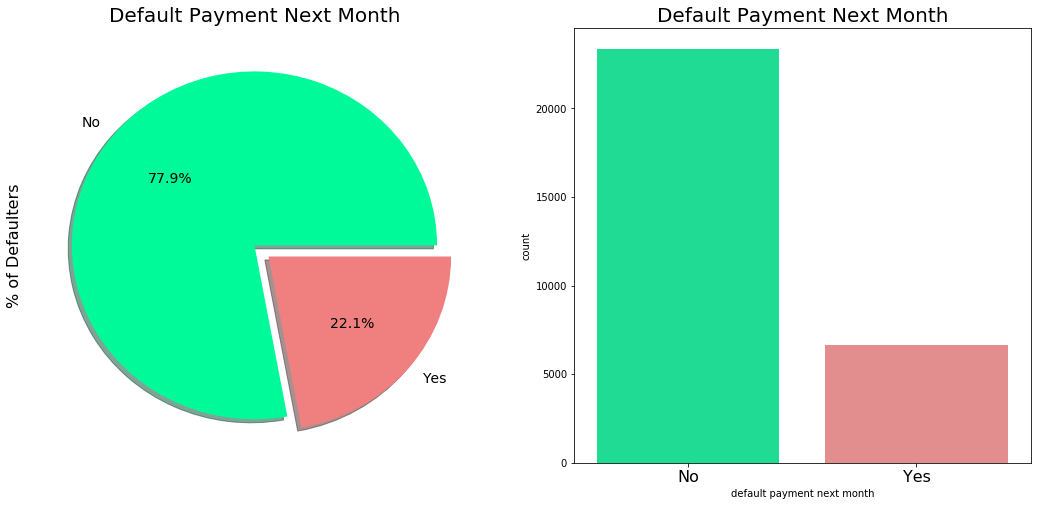

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#00FA9A", "#F08080"]
labels = 'No', 'Yes'
df['default payment next month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Default Payment Next Month', fontsize=20)
ax[0].set_ylabel('% of Defaulters', fontsize=16)
sns.countplot('default payment next month',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Default Payment Next Month', fontsize=20)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=16)
plt.show()

*The Pie chart gives the percentage of defaulters and the Count plot gives the number of defaulters.
We can infer that 22.1% which is 6, 630 customer out of a total of 30,000 will be defaulters next month. Whereas 77.9% which is 23,370 will make the monthly payment.*

# <font color="#07D01E">  III. Methods </font>

# TO START

- download [a4.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a4.tgz). 
- import the necessary classes or functions including NeuralNet.
- inherit NeuralNet and make NeuralNetLogReg

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Summary of Neural Networks

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (Figure 1), we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

Now, let us review the perceptron model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />

In perceptron, passing the output of linear model to the step function, we get discrete outputs. 
Now, you can think a perceptron as a neuron. With a threshold zero, when the linear model outputs are over it, it passes the signal to next neuron. 

By connecting the perceptrons, we can actually build synaptic connections.
We call this model as *multi-layer perceptron* (MLP). 



In [11]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        super().__init__(nunits)
       

    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = 1 / (1 + np.exp(-np.dot(self.add_ones(t), self._W[i])))
            
        return (t, Z)
        


    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):
        c = np.unique(T).tolist()
        T = (T == c).astype(int)
        return super().train(X, T, **params)

    def use(self, X):
        return super().use(X)


## Summary of Nonlinear Logistic Regression

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

We start from the error function below for the derivation before:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 
<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 


$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk^\prime}}} &= -\frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))} \Big)}{\partial{w_{gk^\prime}}} \\
   \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  \kappa_{nk}} \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} g_{nk^\prime}(\xv_n) (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \sum_{g=0}^{G} z1_{ng} w_{gk}  }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big(\sum_{k=1}^{K}  t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( \sum_{k=1}^{K} t_{n,k} I_{kk^\prime} - g_{nk^\prime}(\xv_n) \sum_{k=1}^{K} t_{n,k}  \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( t_{n,k^\prime} - g_{nk^\prime}(\xv_n) \Big) z1_{nk^\prime}.
\end{align}
$$

Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Now let us update the weight $v$ for the hidden layer. 
For the hidden layer, we repeat this: 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))}  \Big)}{\partial{v_{dg}}} \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \frac{\partial \kappa_{nk}} {\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(x_n)) \sum_{g=0}^G w_{gl} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} (1 - z_{ng}^2) x1_{nd}.
\end{align}
$$

Again, coverting in matrix form for the hidden weight update,


$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 

In [12]:
# Shuffle the dataset
data = pd.read_csv(r'Credit Card Defaulters.csv')
data.rename(columns = {'default payment next month':'default'}, inplace=True)
train = data.sample(frac = .75)
test = data.sample(frac = .25)
dataset = train.sample(frac=1).reset_index(drop=True)
dataset1 = test.sample(frac=1).reset_index(drop=True)

# Selecting the columns which show the maximum corelation with the target value
selected_cols = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
X_train = dataset[selected_cols].values
T_train = dataset['default'].values
T_train = T_train.reshape(-1, 1)


X_test = dataset1[selected_cols].values
T_test = dataset1['default'].values
T_test = T_test.reshape(-1, 1)

### Preliminary Analysis Nonlinear Logistic Regression
*First I will be calculating accuracy of the target test set without cross validation and later we will see whether 5 fold cross validation will increase the accuracy of the target test set or not. For this I have taken 4 hidden and I will be training the epochs for 500 times then I use this classifier on my train set and check for the accuracy of the target test set.*

In [13]:
clsf = NeuralNetLogReg([X_train.shape[1], 4, 2]) #Classifier takes input as Non Logistic Regression
T_train = T_train.reshape(T_train.shape[0],1)
clsf.train(X_train, T_train, ftracep=True)
y = clsf.use(X_test)

In [14]:
y= np.argmax(y, 1)

Accuracy:  77.27074844444445 %


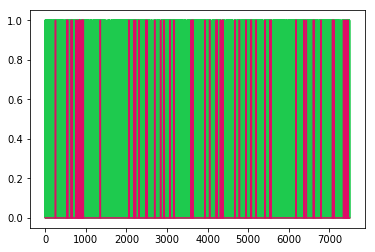

In [15]:
plt.plot(T_test, color = "#1ECA4E")
plt.plot(y, color = "#DE0D67")

print("Accuracy: ", 100 - np.mean(np.abs(T_test - y)) * 100, "%")

### Logistic Regression
The classifier I have picked is Linear Regression.
Logistic regression model predicts $P(T=k \mid \xv)$ for every class k. Reconsidering the Linear Regression model:
$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus, for Logistic Regression we have:

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = y.
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


In [16]:
class LogisticRegression:
    
    def __init__(self, param):
        self.alpha = param[0]
        self.niter = param[1]
        
        self.meanX = None #  mean of inputs (from standardization)
        self.stdX = None # standard deviation of inputs (standardization)
        
    def normalize(self, X): #standardize the input X
              
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Matrix is  wrong ", name]))
        
    
    def add_ones(self, X): # adding a basis
     
        self._check_matrix(X, 'X') #add a column basis to X input matrix
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def g(self, X, w):
        return 1 / (1 + np.exp(-(X @ w)))
    
    def train(self, X, T):
        c = np.unique(T).tolist()
        T = (T == c).astype(int)
        
        X = self.normalize(X)
        X = self.add_ones(X)
        
        self.w = np.random.rand(np.shape(X)[1], len(c))
        
        # Learn weights
        for step in range(self.niter):
            y = self.g(X, self.w)
            self.w += self.alpha * X.T @ (T - y)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        Y = self.g(X, self.w)
        return Y

### Preliminary Analysis Logistic Regression
*Similarly I will do the same for First I will be calculating accuracy of the target test set without cross validation and later we will see whether 5 fold cross validation will increase the accuracy of the target test set or not. For this I have taken my alpha-learning rate to be 0.1 and I will be training the epochs for 500 times then I use this classifier on my train set and check for the accuracy of the target test set.*

In [17]:
alpha_learning_rate= [0.1 , 500]
clsf = LogisticRegression(alpha_learning_rate)
T_train = T_train.reshape(-1,1)
clsf.train(X_train,T_train)
y = clsf.use(X_test)
y_max = np.argmax(y, 1)

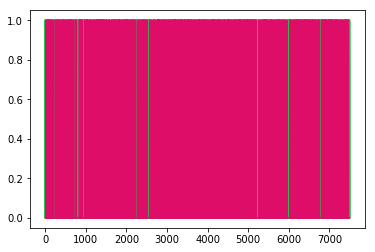

Accuracy:  73.67996444444444 %


In [18]:

plt.plot(T_test, color = "#1ECA4E")
plt.plot(y_max, color = "#DE0D67")
plt.show()

print("Accuracy: ", 100 - np.mean(np.abs(T_test - y_max)) * 100, "%")

### 5-Fold Cross Validation
I have created a 5 fold cross validation function. Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.
In 5-fold cross-validation, the original sample is randomly partitioned into 5 equal size subsamples. Of the 5 subsamples, a single subsample is retained as the validation data for testing the model, and the remaining 4 subsamples are used as training data. The cross-validation process is then repeated 5 times (the folds), with each of the 5 subsamples used exactly once as the validation data. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.<br>
I have defined a function for 5-fold cross validation which takes input parameters as X_train which are the independent variables and T_train which is the dependent variable in the training set.<br>
We create test partitions and validation partitions and then mask all expect the train. After that I have created train classifier and then mask the test set.

In [37]:
def cross_val_5fold(X_train, T_train, args, modelClass):
    fold = int(X_train.shape[0] / 5)
    print(X_train.shape[0])
    index = np.arange(0 , X_train.shape[0] + 1 - fold, fold)
    print(index)
    testerrs = []
    # test partitions
    for i in index:
        # validation partitions
        for j in index:
            if i == j:
                continue
                
            # masking all except train
            mask = np.ones(X_train.shape[0], dtype=bool)
            mask[range(i, i + fold)] = False
            mask[range(j, j + fold)] = False

            x_train = X_train[mask]
            t_train = T_train[mask]
            x_valid = X_train[j: j + fold]
            t_valid = T_train[j: j + fold]

            bestArg = None
            minErr = float('inf')
            for arg in args:
                # train classifier
                clsf = modelClass(arg)
                clsf.train(x_train, t_train)
                valid_y = clsf.use(x_valid)
                err = np.sum(valid_y * t_valid) / x_valid.shape[0]

                if err < minErr:
                    bestArg = arg

        # mask test set
        mask = np.ones(X_train.shape[0], dtype=bool)
        mask[range(i, i + fold)] = False
        x_train = X_train[mask]
        t_train = T_train[mask]
        x_test = X_train[i:i + fold]
        t_test = T_train[i:i + fold]
            
        clsf = modelClass(arg)
        clsf.train(x_train, t_train)
        y_test = clsf.use(x_valid)
        testerrs.append((arg,np.sum(y_test * t_test) / x_test.shape[0]))
            
    return testerrs

# <font color="#C34F0D"> IV - Results </font>

### Logistic Regression with 5-fold Cross Validation
*First, we will train our Logistic Regression classifier with 5-fold cross validation and then find the best structure parameter for Logistic regression. For this I have created a function called test_err which will take the best argument *

### Experiment 1
#### Parameter choice
For experiment 1, I have taken my parameters, alpha to be 0.1 and 0.01 and number of times the data trains is 500. In this the model will find the best parameter among the parameter provided and the plot the graphs and calculate accuracy, f-score, confusion matrix and ROC curve.

In [38]:
alpha_learning_rate = [[0.1, 500]]
test_errs = cross_val_5fold(X_train, T_train, alpha_learning_rate, LogisticRegression)

22500
[    0  4500  9000 13500 18000]


In [40]:
# find best parameter
minErr = float('inf')
for test_err in test_errs:
    if test_err[1] < minErr:
        best_arg = test_err[0]
        minErr = test_err[1]
        
model = LogisticRegression(best_arg)
model.train(X_train, T_train)
Y = model.use(X_test)

In [41]:
c = np.argmax(Y, axis=1).reshape(-1, 1)

Accuracy:  74.74666666666667 %


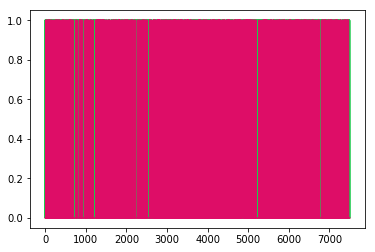

In [42]:
plt.plot(T_test, color = "#1ECA4E")
plt.plot(c, color = "#DE0D67")
print("Accuracy: ", 100 - np.mean(np.abs(T_test - c)) * 100, "%")

In [43]:
P = Y[:, 1].reshape(-1, 1)
#print(np.count_nonzero(np.isnan(data)))
# ROC Curve
fpr, tpr, thresh = metrics.roc_curve(T_test, P, pos_label=1)


# Prepare statistics Dataframe
stats = dict()
stats['accuracy'] = metrics.accuracy_score(T_test, c)
stats['precision'], stats['recall'], stats['f-score'], stats['support'] = \
metrics.precision_recall_fscore_support(T_test, c)
stats['auc'] = np.trapz(tpr, fpr)
stats = pd.DataFrame(stats, index=['negative', 'positive']).round(2)
stats

,accuracy,auc,f-score,precision,recall,support
negative,0.750,0.510,0.850,0.780,0.930,5828
positive,0.750,0.510,0.160,0.310,0.100,1672


Text(0,0.5,'True Positive Rate')

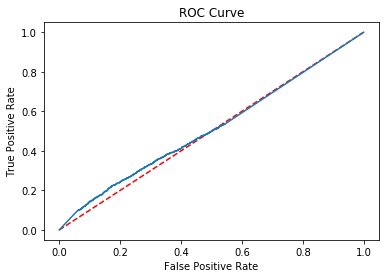

In [44]:
# ROC Curve
fig.add_subplot(1, 3, 3)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


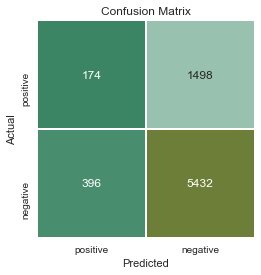

In [47]:
cm = metrics.confusion_matrix(T_test, c)
cm = np.flip(np.flip(cm, axis=0), axis=1)
cm = pd.DataFrame(cm, index=['positive', 'negative'], columns=['positive', 'negative'])
sns.set(style="white")
fig.add_subplot(1, 3, 1)
cmap = sns.diverging_palette(150, 100, as_cmap=True)
sns.heatmap(cm, fmt="d", cmap=cmap, annot=True, square=True, cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual');
plt.xlabel('Predicted');

### Experiment 2
#### Parameter choice
For experiment 2, I have taken my parameters, alpha to be the same but increased the training  and number of times the data trains is 1000. In this the model will find the best parameter among the parameter provided and the plot the graphs and calculate accuracy, f-score, confusion matrix and ROC curve. We will also compare the results of both the experiments.

In [48]:
alpha_learning_rate = [(0.1, 1000), (0.01, 1000) ]
test_errs = cross_val_5fold(X_train, T_train, alpha_learning_rate, LogisticRegression)

22500
[    0  4500  9000 13500 18000]


In [49]:
# find best parameter
minErr = float('inf')
for test_err in test_errs:
    if test_err[1] < minErr:
        best_arg = test_err[0]
        minErr = test_err[1]
        
model = LogisticRegression(best_arg)
model.train(X_train, T_train)
Y = model.use(X_test)

In [50]:
c = np.argmax(Y, axis=1).reshape(-1, 1)

Accuracy:  73.68 %


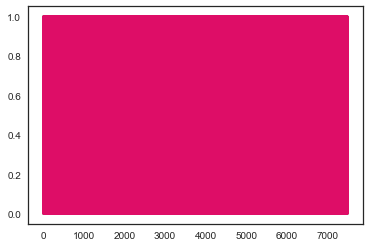

In [51]:
plt.plot(T_test, color = "#1ECA4E")
plt.plot(c, color = "#DE0D67")
print("Accuracy: ", 100 - np.mean(np.abs(T_test - c)) * 100, "%")

In [52]:
P = Y[:, 1].reshape(-1, 1)
#print(np.count_nonzero(np.isnan(data)))
# ROC Curve
fpr, tpr, thresh = metrics.roc_curve(T_test, P, pos_label=1)


# Prepare statistics Dataframe
stats = dict()
stats['accuracy'] = metrics.accuracy_score(T_test, c)
stats['precision'], stats['recall'], stats['f-score'], stats['support'] = \
metrics.precision_recall_fscore_support(T_test, c)
stats['auc'] = np.trapz(tpr, fpr)
stats = pd.DataFrame(stats, index=['negative', 'positive']).round(2)
stats

,accuracy,auc,f-score,precision,recall,support
negative,0.740,0.670,0.820,0.860,0.800,5828
positive,0.740,0.670,0.470,0.430,0.530,1672


C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'True Positive Rate')

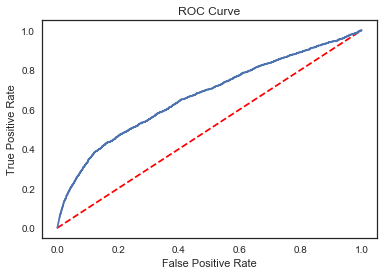

In [53]:
# ROC Curve
fig.add_subplot(1, 3, 3)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

C:\Users\Nipun\Anaconda3\envs\mlbook\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


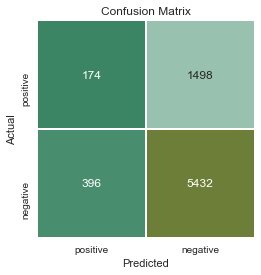

In [54]:
sns.set(style="white")
fig.add_subplot(1, 3, 1)
cmap = sns.diverging_palette(150, 100, as_cmap=True)
sns.heatmap(cm, fmt="d", cmap=cmap, annot=True, square=True, cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual');
plt.xlabel('Predicted');

### Classification Results
When I keep the alpha same and increase the training on the model we can see that the accuracy also increase.

### Neural Network with 5-fold Cross Validation
*First, we will train our Logistic Regression classifier with 5-fold cross validation and then find the best structure parameter for Logistic regression. For this I have created a function called test_err which will take the best argument *

### Experiment 1
#### Network structure choice
For this I have taken two hidden layers for my model and see what is the accuracy, f-score, confusion matrix and ROC curve of the data. 

In [ ]:
nunits = [[23, 3, 2], [23, 4, 2]]
test_er = cross_val_5fold(X_train, T_train, nunits, NeuralNetLogReg)

22500
[    0  4500  9000 13500 18000]


In [ ]:
# find best parameter
minErr = float('inf')
for test_err in test_er:
    if test_err[1] < minErr:
        best_arg = test_err[0]
        minErr = test_err[1]
        
model = NeuralNetLogReg(best_arg)
model.train(X_train, T_train)
Y = model.use(X_test)

In [ ]:
c = np.argmax(Y, axis=1).reshape(-1, 1)

In [ ]:
plt.plot(T_test, color = "#1ECA4E")
plt.plot(c, color = "#DE0D67")
print("Accuracy: ", 100 - np.mean(np.abs(T_test - c)) * 100, "%")

In [ ]:
P = Y[:, 1].reshape(-1, 1)
# ROC Curve
fpr, tpr, thresh = metrics.roc_curve(T_test, P, pos_label=1)


# Prepare statistics Dataframe
stats = dict()
stats['accuracy'] = metrics.accuracy_score(T_test, c)
stats['precision'], stats['recall'], stats['f-score'], stats['support'] = \
metrics.precision_recall_fscore_support(T_test, c)
stats['auc'] = np.trapz(tpr, fpr)
stats = pd.DataFrame(stats, index=['negative', 'positive']).round(2)
stats

In [ ]:
sns.set(style="white")
fig.add_subplot(1, 3, 1)
cmap = sns.diverging_palette(150, 100, as_cmap=True)
sns.heatmap(cm, fmt="d", cmap=cmap, annot=True, square=True, cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [ ]:
# ROC Curve
fig.add_subplot(1, 3, 3)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Experiment 2
#### Network structure choice
For this I have added a third hidden layers to see how it affects the accuracy of the model and I will be comparing the results of accuracy, f-score, confusion matrix and ROC curve with that of the experiment 1.

In [ ]:
nunits = [[23, 3, 2], [23, 4, 2], [23, 5, 2]]
test_er = cross_val_5fold(X_train, T_train, nunits, NeuralNetLogReg)

In [ ]:
# find best parameter
minErr = float('inf')
for test_err in test_er:
    if test_err[1] < minErr:
        best_arg = test_err[0]
        minErr = test_err[1]
        
model = NeuralNetLogReg(best_arg)
model.train(X_train, T_train)
Y = model.use(X_test)

In [ ]:
c = np.argmax(Y, axis=1).reshape(-1, 1)

In [ ]:
plt.plot(T_test, color = "#1ECA4E")
plt.plot(c, color = "#DE0D67")
print("Accuracy: ", 100 - np.mean(np.abs(T_test - c)) * 100, "%")

In [ ]:
P = Y[:, 1].reshape(-1, 1)
# ROC Curve
fpr, tpr, thresh = metrics.roc_curve(T_test, P, pos_label=1)


# Prepare statistics Dataframe
stats = dict()
stats['accuracy'] = metrics.accuracy_score(T_test, c)
stats['precision'], stats['recall'], stats['f-score'], stats['support'] = \
metrics.precision_recall_fscore_support(T_test, c)
stats['auc'] = np.trapz(tpr, fpr)
stats = pd.DataFrame(stats, index=['negative', 'positive']).round(2)
stats

In [ ]:
sns.set(style="white")
fig.add_subplot(1, 3, 1)
cmap = sns.diverging_palette(150, 100, as_cmap=True)
sns.heatmap(cm, fmt="d", cmap=cmap, annot=True, square=True, cbar=False, linewidths=.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [ ]:
# ROC Curve
fig.add_subplot(1, 3, 3)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Classification results
As we can see from experiment 1 and experiment 2, when we add a hidden layer to our network structure the accuracy of the model increase, this is because as we add more layers the dimensionality increase and we reduce the complexity of the problem.

### Classification model comparison
As we can see from the above results Non Linear Logistic Regression Model is better than Logistic Regression, the reason being the hidden layers where each layer can apply any function you want to the previous layer, the hidden layer's job is to transform the inputs into something that the output layer can use and the output layer transforms the hidden layer activations into whatever scale you wanted your output to be on. Hence, the accuracy of Non Linear Logistic Regression Model is better than Logistic Regression after applying 5-fold cross validation 

### Classification results Summary
The classification results have improved after applying 5 fold cross validation to the models, Logistic Regression and Non Linear Logistic Regression. 5-fold cross-validation estimator has a lower variance than a single hold-out set estimator, which can be very important if the amount of data available is limited. If you have a single hold out set, where 90% of data are used for training and 10% used for testing, the test set is very small, so there will be a lot of variation in the performance estimate for different samples of data, or for different partitions of the data to form training and test sets. 5-fold validation reduces this variance by averaging over k different partitions, so the performance estimate is less sensitive to the partitioning of the data. We can go even further by repeated k-fold cross-validation, where the cross-validation is performed using different partitioning of the data to form k sub-sets, and then taking the average over that as well. 